<a href="https://colab.research.google.com/github/edgleuma-abreu/IGTI/blob/main/Projeto_Aplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAÇÃO DE BIBLIOTECAS**

In [93]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats

import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

import datetime

In [135]:
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs




# settings
import warnings
warnings.filterwarnings("ignore")

In [95]:
#Ler dados
df =pd.read_csv("dataset_pa.csv", delimiter=";")



In [105]:
df.head(20)

,datahora,mem,cpu_usage
0,2022-10-02 14:00:00,223,6.37
1,2022-10-02 15:00:00,224,6.07
2,2022-10-02 16:00:00,224,6.31
3,2022-10-02 17:00:00,224,6.18
4,2022-10-02 18:00:00,224,6.28
5,2022-10-02 19:00:00,224,6.16
6,2022-10-02 20:00:00,224,6.30
7,2022-10-02 21:00:00,223,6.21
8,2022-10-02 22:00:00,224,6.14
9,2022-10-02 23:00:00,224,5.94


In [97]:
#Tamanho do dataset
df.shape

(169, 3)

In [104]:
#Verificar valores nulos
df.isna().sum()

datahora     0
mem          0
cpu_usage    0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datahora   169 non-null    object 
 1   mem        169 non-null    int64  
 2   cpu_usage  169 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [99]:
#converter campo "datahora"para datetime
df[["datahora"]] = df[["datahora"]].apply(pd.to_datetime, format="%d/%m/%y %H:%M")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datahora   169 non-null    datetime64[ns]
 1   mem        169 non-null    int64         
 2   cpu_usage  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.1 KB
None


In [91]:
#Verificar correlação entre os dados
df.corr()

,mem,cpu_usage
mem,1.000000,-0.328682
cpu_usage,-0.328682,1.000000


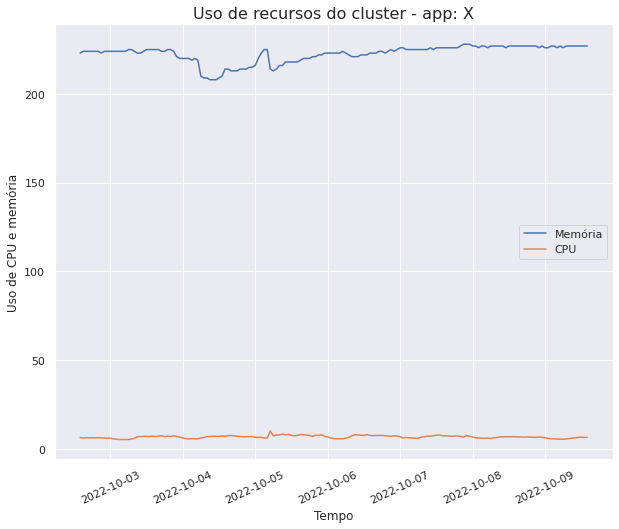

In [103]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='datahora', y='mem', data = df)
sns.lineplot(x='datahora', y='cpu_usage', data = df)
plt.title("Uso de recursos do cluster - app: X", fontsize=16)
plt.ylabel("Uso de CPU e memória")
plt.xlabel("Tempo")

plt.xticks(rotation=25)

plt.legend( loc='middle right', labels=['Memória', 'CPU'])


**DATASET MENSAL**

In [149]:
#Ler dados
df_mensal =pd.read_csv("dataset_mensal.csv", delimiter=";")

#mem: MiB
#cpu: mCores

In [118]:
df_mensal.head(20)

,datahora,mem_usage,cpu_usage
0,10/09/22 03:00,236,5.58
1,10/09/22 09:00,236,5.46
2,10/09/22 15:00,236,5.99
3,10/09/22 21:00,236,5.85
4,11/09/22 03:00,236,5.44
5,11/09/22 09:00,236,5.31
6,11/09/22 15:00,237,5.76
7,11/09/22 21:00,237,5.70
8,12/09/22 03:00,237,5.50
9,12/09/22 09:00,237,5.49


In [147]:
#Verificar dados nulos
df_mensal.isna().sum()

## Não foram identificados dados NULOS no dataset

datahora     0
mem_usage    0
cpu_usage    0
dtype: int64

In [150]:
#Validar tipos de dados
df_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datahora   121 non-null    object 
 1   mem_usage  121 non-null    int64  
 2   cpu_usage  121 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [151]:
#converter campo "datahora" para datetime
df_mensal[["datahora"]] = df_mensal[["datahora"]].apply(pd.to_datetime, format="%d/%m/%y %H:%M")

print(df_mensal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datahora   121 non-null    datetime64[ns]
 1   mem_usage  121 non-null    int64         
 2   cpu_usage  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB
None


In [152]:
#Verificar correlação entre os dados
df_mensal.corr()

###Não foi identificada correlação entre as variáveis


,mem_usage,cpu_usage
mem_usage,1.00000,-0.02545
cpu_usage,-0.02545,1.00000


(array([738407., 738411., 738415., 738419., 738423., 738427., 738429.,
        738433., 738437.]), <a list of 9 Text major ticklabel objects>)

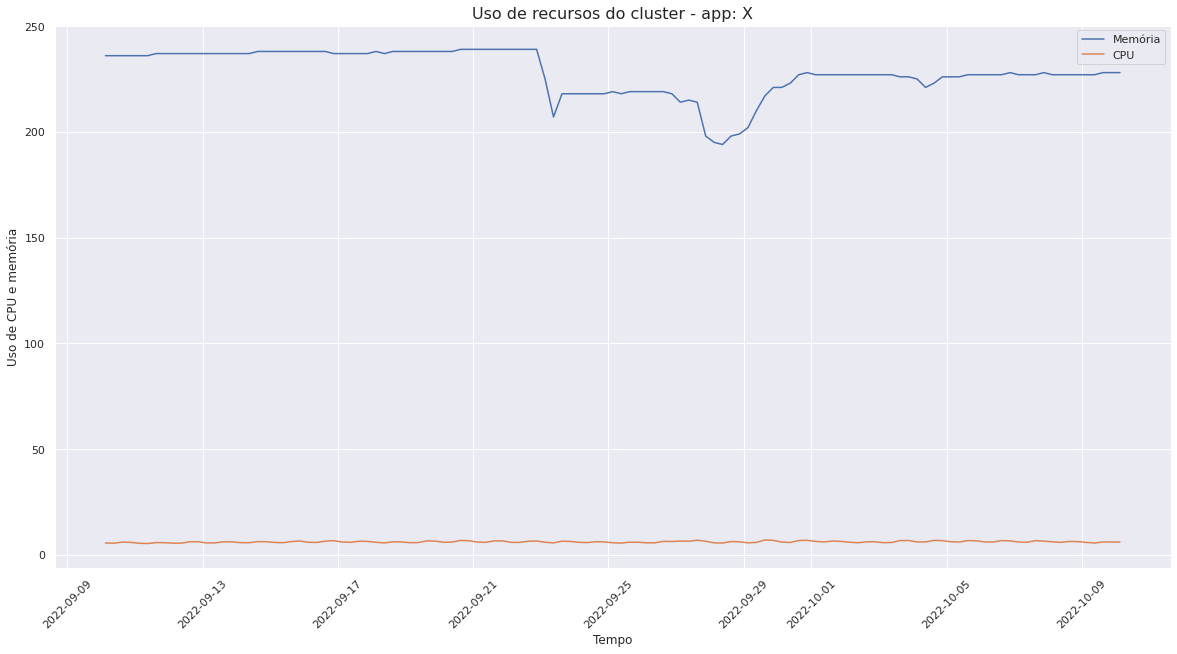

In [153]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='datahora', y='mem_usage', data = df_mensal)
sns.lineplot(x='datahora', y='cpu_usage', data = df_mensal)
plt.title("Uso de recursos do cluster - app: X", fontsize=16)
plt.ylabel("Uso de CPU e memória")
plt.xlabel("Tempo")
plt.legend( labels=['Memória', 'CPU'])
plt.xticks(rotation=45)





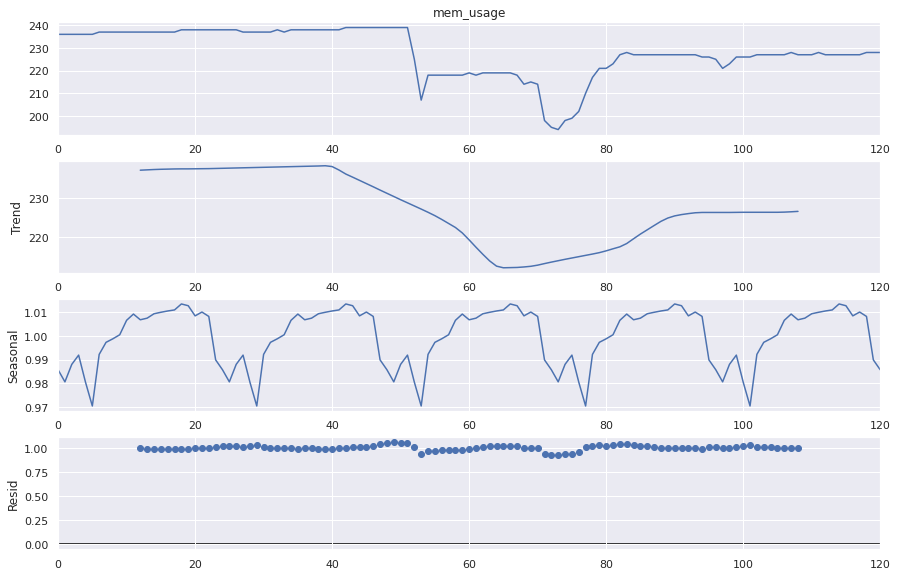

In [138]:
seasonal = seasonal_decompose(df_mensal['mem_usage'], model='multiplicative', period=24)
fig = seasonal.plot()
fig.set_size_inches((12, 8))
plt.show()

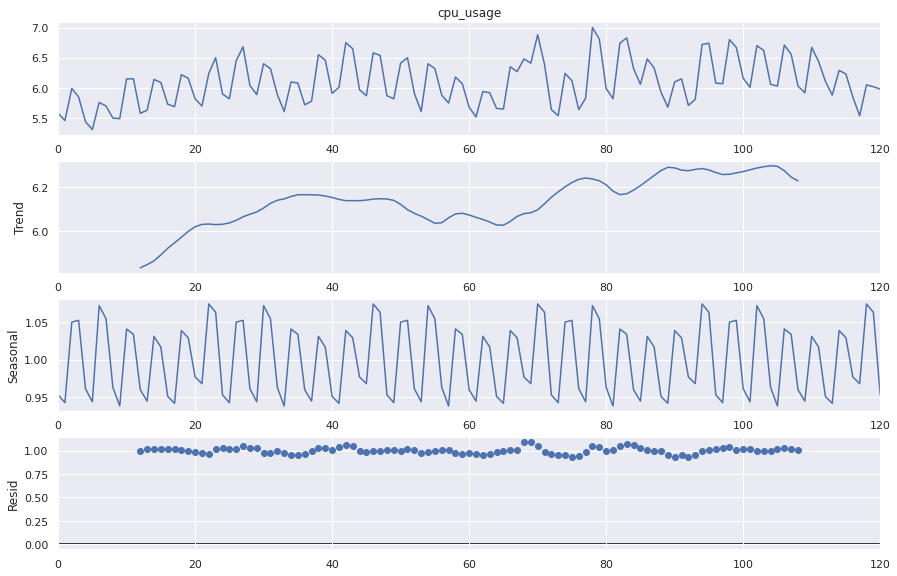

In [146]:
seasonal = seasonal_decompose(df_mensal['cpu_usage'], model='multiplicative', period=24)
fig = seasonal.plot()
fig.set_size_inches((12, 8))
plt.show()

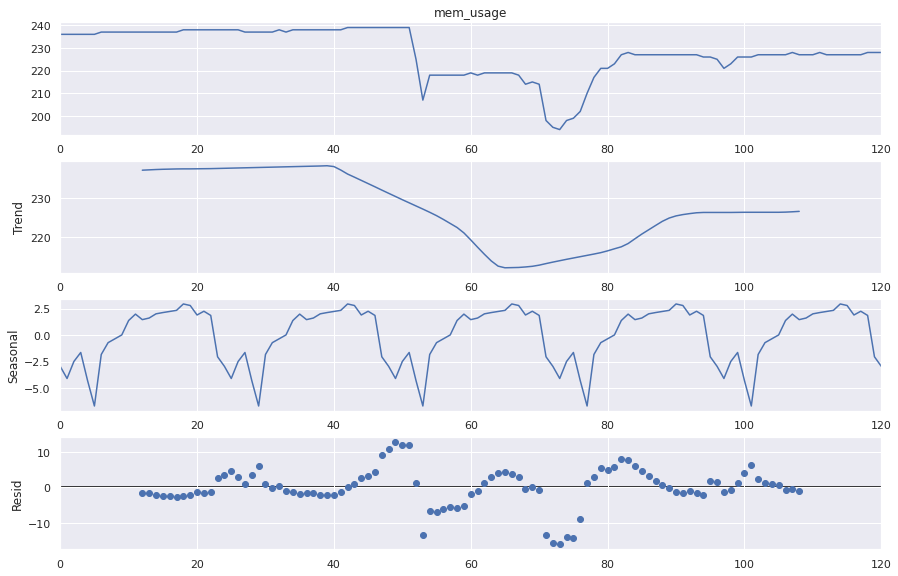

In [144]:

seasonal = seasonal_decompose(df_mensal['mem_usage'], model='additive', period=24)
fig = seasonal.plot()
fig.set_size_inches((12, 8))
plt.show()

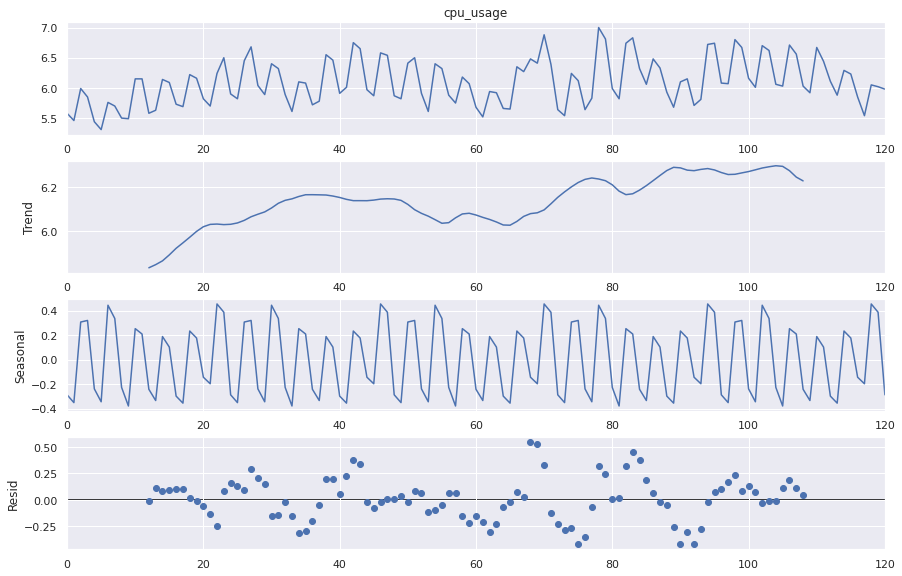

In [145]:
seasonal = seasonal_decompose(df_mensal['cpu_usage'], model='additive', period=24)
fig = seasonal.plot()
fig.set_size_inches((12, 8))
plt.show()

**PREPARAÇÃO DOS DADOS**

##Fazer resample do dataset_pa e ver se fica bom ou pior :(

##Entender o decompose